In [1]:
from diffusers import DDPMPipeline
import torch
from torchvision import transforms
from torch.distributions import Categorical
from PIL import Image
import matplotlib.pyplot as plt
from utils import plot_image
from tqdm import tqdm
import numpy as np

/users/eleves-a/2021/gaetan.narozniak/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-04-10 15:53:28.172585: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-10 15:53:28.179644: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744293208.187882   49889 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744293208.190343   49889 cuda_

In [2]:
torch.cuda.empty_cache()
torch.cuda.ipc_collect()

model_id = "google/ddpm-ema-celebahq-256"
ddpm = DDPMPipeline.from_pretrained(model_id)
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print("using device: ", device)

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]An error occurred while trying to fetch /users/eleves-a/2021/gaetan.narozniak/.cache/huggingface/hub/models--google--ddpm-ema-celebahq-256/snapshots/4cb6117472e6e4f45c5afe606b101858c27c3802: Error no file named diffusion_pytorch_model.safetensors found in directory /users/eleves-a/2021/gaetan.narozniak/.cache/huggingface/hub/models--google--ddpm-ema-celebahq-256/snapshots/4cb6117472e6e4f45c5afe606b101858c27c3802.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
Loading pipeline components...: 100%|██████████| 2/2 [00:00<00:00, 33.83it/s]

using device:  cuda:0


In [3]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

image = Image.open("pictures/gaetan.jpeg").convert("RGB")
tensor_image = transform(image).unsqueeze(0).to(device)
tensor_image.shape

torch.Size([1, 3, 256, 256])

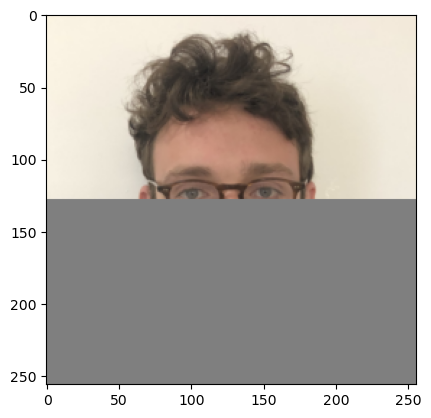

  3%|▎         | 1/31 [00:01<00:47,  1.58s/it]

tensor([450.0469, 451.2930, 438.0000, 461.3984, 451.0625, 442.8789, 452.4492,
        457.0039, 463.0352, 406.9297, 422.0078, 467.1523, 425.1758, 447.6875,
        457.4062, 425.0898, 475.7422, 425.4219, 468.7734, 390.5312, 460.5859,
        436.4570, 461.3906, 451.6328, 417.6367, 468.1602, 425.0508, 449.8789,
        468.6445, 492.0938, 443.5234, 408.1250], device='cuda:0') tensor([25,  8, 25, 13, 24, 31,  2, 22,  9, 25, 10, 30,  4, 26,  7,  1, 16, 20,
         6, 16,  2, 31, 17, 12,  0, 16, 18,  9,  5, 29, 15, 28],
       device='cuda:0')


  6%|▋         | 2/31 [00:02<00:41,  1.44s/it]

tensor([387.1133, 417.3594, 415.1797, 428.6211, 450.0703, 413.1719, 438.6602,
        479.5625, 437.9766, 394.4805, 463.7852, 448.1367, 455.0859, 430.2227,
        420.3359, 455.5820, 461.8047, 447.5547, 449.1836, 442.1094, 427.2656,
        432.6406, 435.2070, 375.3789, 440.4062, 439.9609, 386.3359, 413.2031,
        394.6133, 427.5703, 433.4922, 462.1562], device='cuda:0') tensor([17,  8,  3, 12, 17, 14, 22, 30, 10, 20, 10, 28, 22, 28, 18,  6,  9, 26,
         5, 10, 27, 11,  6, 27,  3,  0,  7, 14,  8, 19, 18,  7],
       device='cuda:0')


 10%|▉         | 3/31 [00:04<00:37,  1.36s/it]

tensor([448.2539, 432.6289, 428.2734, 443.9805, 443.8320, 418.5508, 415.4141,
        415.6406, 407.0352, 391.3125, 387.5156, 416.1875, 417.6328, 415.9688,
        422.5273, 411.4727, 438.4492, 433.8242, 453.8594, 402.1680, 439.4922,
        420.8828, 433.8008, 451.9102, 434.3828, 440.7969, 426.1953, 418.4062,
        438.5664, 445.9062, 424.1875, 420.7109], device='cuda:0') tensor([22, 26, 29,  8, 24, 12, 15, 31, 15, 21, 25, 18, 27, 22,  3,  8,  5, 23,
        25,  6, 23, 21, 18,  2, 22,  9, 25,  9,  0,  7, 19, 11],
       device='cuda:0')


 13%|█▎        | 4/31 [00:05<00:35,  1.32s/it]

tensor([429.8516, 415.7578, 420.2617, 423.1680, 418.4414, 428.3516, 422.9219,
        419.8594, 435.8750, 477.4727, 386.9453, 426.6562, 418.9219, 406.5703,
        427.7891, 445.7148, 438.3047, 415.5039, 388.9648, 439.5664, 430.6406,
        494.0430, 412.4336, 453.8828, 422.0195, 433.4219, 396.8906, 429.5352,
        425.0547, 438.6250, 448.5859, 426.6953], device='cuda:0') tensor([28, 12, 29, 26,  2, 30,  9, 15,  6,  0,  6, 22, 26,  5, 29,  2, 30, 31,
        14, 23, 14, 26, 28, 16, 13, 16, 29, 16,  3, 23,  3, 18],
       device='cuda:0')


 16%|█▌        | 5/31 [00:06<00:33,  1.30s/it]

tensor([441.5664, 442.4375, 475.6602, 435.4414, 450.3555, 406.5000, 431.1797,
        440.6367, 435.6875, 437.3359, 443.6250, 455.8281, 425.3125, 431.0352,
        440.7148, 419.3906, 408.6094, 474.2656, 438.4883, 430.5742, 415.3203,
        442.4336, 433.7539, 423.8555, 447.5820, 439.0078, 459.2344, 412.4688,
        453.3633, 455.2344, 450.8750, 436.4102], device='cuda:0') tensor([15,  0, 25,  3, 15, 30, 15, 12, 30, 11, 19,  9, 25, 17, 29, 14, 15, 22,
        15, 21,  3, 15, 20, 26,  5, 25, 23, 27, 18,  4, 12, 15],
       device='cuda:0')


 19%|█▉        | 6/31 [00:07<00:32,  1.28s/it]

tensor([428.7109, 430.8359, 455.1602, 469.6797, 416.7617, 480.6875, 431.4727,
        461.7461, 479.0898, 463.6914, 463.3633, 439.2539, 484.2734, 413.7148,
        464.4297, 451.6562, 446.8477, 438.3359, 428.5547, 483.2891, 423.2422,
        451.3477, 463.8594, 430.2109, 481.5000, 456.0117, 470.6445, 462.8398,
        434.3555, 410.8516, 443.8477, 408.6562], device='cuda:0') tensor([14, 17,  3, 31, 23, 10, 16, 16, 30, 10, 12, 29, 17, 11, 19,  7, 29, 29,
         7,  5, 12, 19, 27, 29, 18, 31, 23,  5, 10, 20,  6,  5],
       device='cuda:0')


 23%|██▎       | 7/31 [00:09<00:30,  1.27s/it]

tensor([523.5938, 440.4570, 472.1914, 477.3203, 460.0039, 489.4414, 449.4453,
        467.4766, 458.3047, 481.0859, 483.9688, 476.3555, 408.7969, 442.1406,
        469.7461, 452.0039, 469.2188, 476.8555, 462.5352, 495.7695, 465.2031,
        459.6055, 467.1055, 491.6133, 473.2969, 469.3398, 460.6250, 471.8320,
        513.5742, 498.6133, 475.9570, 492.2109], device='cuda:0') tensor([26, 12,  7, 26,  6, 27,  1,  7, 21,  7, 11, 11, 25,  9,  6, 31, 14,  3,
        10, 14, 21, 16, 25, 12, 20,  4, 19, 16, 18, 24,  0, 10],
       device='cuda:0')


 26%|██▌       | 8/31 [00:10<00:29,  1.27s/it]

tensor([508.6406, 478.5625, 498.4727, 521.5078, 517.6367, 503.8281, 459.3438,
        502.1289, 502.5078, 498.5508, 545.8867, 551.2617, 518.8789, 562.8398,
        530.2109, 565.0547, 520.1641, 509.5273, 516.4141, 512.7109, 522.2383,
        495.3828, 500.7227, 476.9297, 496.1055, 499.4922, 508.5039, 506.7461,
        502.1953, 511.2188, 552.5547, 502.5117], device='cuda:0') tensor([ 8,  6, 15,  1, 18,  7, 22, 23, 11,  7, 24, 28, 21, 27, 14, 15, 23, 20,
        16, 14, 16,  2, 26,  9, 14,  6, 25, 20, 17, 13,  7,  2],
       device='cuda:0')


 29%|██▉       | 9/31 [00:11<00:27,  1.26s/it]

tensor([612.2422, 538.9531, 619.7969, 501.7812, 601.8164, 536.1992, 581.5273,
        520.2461, 584.8984, 547.3398, 609.8867, 543.0938, 617.0156, 584.8555,
        545.5859, 617.0273, 518.9961, 564.7695, 572.2812, 563.0898, 549.2812,
        559.5977, 597.3672, 546.9141, 549.3594, 562.6523, 578.1523, 605.5547,
        554.8984, 595.4258, 536.9805, 573.9375], device='cuda:0') tensor([28, 23, 30,  6,  4, 21,  4, 17, 15, 12, 30, 18,  2, 12, 10, 31, 21,  3,
         3, 23, 29,  6,  1, 14, 15,  6, 18, 30, 22,  6, 14,  2],
       device='cuda:0')


 32%|███▏      | 10/31 [00:12<00:26,  1.26s/it]

tensor([688.1172, 645.8438, 647.5703, 643.7969, 658.5117, 678.5703, 635.5156,
        639.8398, 689.8125, 675.8789, 635.5195, 645.3047, 719.0469, 657.9922,
        678.9883, 647.8047, 685.0273, 550.3008, 544.9766, 659.4141, 724.3984,
        650.2969, 557.2812, 673.9883, 681.4414, 644.5000, 655.8906, 627.9805,
        686.7930, 667.6484, 658.5469, 694.2500], device='cuda:0') tensor([ 7, 25,  9, 11, 18,  9, 16, 10, 19, 18,  9,  3,  0,  4,  7, 25, 14,  2,
         2, 19, 28,  9,  3,  6,  9, 24, 27, 25, 19, 24, 24, 30],
       device='cuda:0')


 35%|███▌      | 11/31 [00:14<00:25,  1.26s/it]

tensor([765.9375, 768.8438, 820.4883, 788.7734, 639.6250, 798.1172, 757.5234,
        760.4531, 771.4648, 635.2852, 812.2930, 794.3594, 825.8672, 849.4531,
        771.8516, 781.7461, 824.6328, 746.0039, 763.5820, 758.1836, 845.8086,
        807.8750, 784.3633, 856.6602, 807.4336, 844.2734, 746.9336, 786.0781,
        773.4727, 865.2773, 863.0977, 790.7070], device='cuda:0') tensor([27,  5, 27, 21, 29, 29,  8, 29, 28,  5,  4, 25, 31, 14, 26,  9,  4, 24,
        11, 11,  0, 20, 29, 12, 11,  4, 23, 23,  2, 20,  9, 26],
       device='cuda:0')


 39%|███▊      | 12/31 [00:15<00:23,  1.26s/it]

tensor([ 998.8672, 1024.0430,  989.7734, 1046.4844, 1046.9062, 1053.0547,
         954.4492, 1053.6641,  926.8828, 1040.2383,  813.5742, 1056.2188,
         953.0156,  938.5039,  920.5508,  796.3203,  802.1719, 1050.7891,
         992.9336,  994.8867,  940.5469, 1015.8438, 1031.5312,  973.0781,
         989.5586,  812.1367, 1018.7812, 1024.5781, 1043.6914, 1008.0586,
         771.8750,  927.1641], device='cuda:0') tensor([28, 17, 10, 24, 10, 10,  3,  6, 16,  0, 19, 25, 18,  8,  9, 29,  7,  8,
        20,  7, 26, 22, 27, 16, 15,  3, 30, 17,  6,  1, 20,  3],
       device='cuda:0')


 42%|████▏     | 13/31 [00:16<00:22,  1.26s/it]

tensor([1277.6328, 1261.2383,  980.3125, 1238.4844,  994.4727,  992.1719,
        1283.1172, 1202.7227, 1001.5820, 1240.3359, 1225.0391,  989.7422,
        1206.6992, 1193.2734, 1268.1250, 1259.4609, 1315.3711, 1183.3906,
        1189.6445, 1328.9141, 1295.6016, 1301.3047, 1354.1250, 1005.8281,
         997.9570, 1290.6641,  988.6914, 1268.1797, 1195.6289, 1291.6992,
        1176.2578, 1274.5703], device='cuda:0') tensor([ 4, 22, 29, 28,  2,  9, 22,  2,  7, 17,  4, 19, 16,  3, 25, 20, 14,  3,
         6, 27, 25, 15,  8, 20,  1, 31, 25, 23, 27, 11,  7, 21],
       device='cuda:0')


 45%|████▌     | 14/31 [00:18<00:21,  1.26s/it]

tensor([1250.3750, 1695.2227, 1626.5234, 1528.2031, 1215.8203, 1568.8203,
        1712.7266, 1219.1211, 1516.6836, 1506.0234, 1242.4414, 1651.1875,
        1685.5156, 1533.5742, 1657.5820, 1667.0508, 1643.3711, 1529.9922,
        1645.4453, 1645.6875, 1658.4648, 1638.7695, 1212.5156, 1689.7773,
        1618.7695, 1648.2227, 1652.7812, 1223.7109, 1635.8242, 1220.7148,
        1516.1289, 1704.8516], device='cuda:0') tensor([31, 18, 26, 16,  4, 16,  9, 15, 18,  2, 12, 23, 20,  3, 23,  1, 12,  6,
        14, 18, 15, 26,  0,  0,  9, 18, 11,  5, 12, 11,  4, 10],
       device='cuda:0')


 48%|████▊     | 15/31 [00:19<00:20,  1.26s/it]

tensor([2174.8906, 2088.0156, 2121.4531, 2075.9219, 1560.7109, 2074.1602,
        1904.7383, 2171.8359, 2084.0195, 2054.3203, 2188.2617, 2162.2500,
        2096.7734, 1967.2344, 2191.1719, 2182.7227, 2212.7539, 2218.7109,
        2083.5234, 2071.8633, 2185.3125, 2104.2930, 1558.6172, 1569.2227,
        1882.4258, 2079.6172, 2135.5938, 2020.7422, 2189.3164, 2146.3164,
        1553.9102, 1565.1562], device='cuda:0') tensor([17,  0, 24, 19, 28, 24,  4, 21, 25, 24,  9,  0,  1, 13, 13, 31, 18, 21,
        10,  8, 23, 26, 18, 27, 24,  1, 11, 12, 22, 14,  7,  9],
       device='cuda:0')


 52%|█████▏    | 16/31 [00:20<00:18,  1.26s/it]

tensor([2818.5977, 2768.0312, 2445.2578, 2714.3125, 2810.0312, 2435.2109,
        1920.4570, 2713.6328, 2690.0625, 2430.3906, 2645.5000, 2773.4844,
        2691.4570, 2510.2812, 2508.7539, 1896.0312, 2699.7227, 2714.6289,
        2775.2266, 2706.3945, 1946.4961, 2774.1641, 2706.3867, 2572.8867,
        2425.5352, 2670.8828, 2818.2695, 2682.4648, 1941.9414, 2811.6328,
        2806.0156, 2659.2305], device='cuda:0') tensor([14, 13, 17, 18,  1, 15,  4, 17,  2, 25,  1, 22,  1, 11, 13, 25, 31, 31,
         0, 22, 31, 13,  5, 22, 27,  4,  2, 17,  2, 27,  9, 23],
       device='cuda:0')


 55%|█████▍    | 17/31 [00:21<00:17,  1.26s/it]

tensor([3140.1953, 3191.0977, 3472.3750, 3603.0742, 3594.8828, 2363.0039,
        3633.9531, 3468.6367, 3112.8750, 3460.0664, 3566.3906, 3465.6133,
        3567.7070, 3554.4297, 3187.5195, 3445.0273, 3440.9570, 3413.9531,
        3642.9141, 3459.9453, 3425.8594, 3171.7969, 3109.2109, 3439.8984,
        3438.9180, 3587.9844, 3139.8359, 3463.1484, 3108.8477, 3439.4961,
        3110.8125, 3306.6094], device='cuda:0') tensor([23, 30, 30, 29, 14,  3, 15, 31,  1, 25, 29,  4, 11, 27,  7,  8, 22, 22,
        31,  1, 29, 25, 10, 26,  4, 24, 23, 19, 14, 25, 26, 18],
       device='cuda:0')


 58%|█████▊    | 18/31 [00:23<00:16,  1.26s/it]

tensor([4458.1367, 3918.3750, 3917.1328, 4431.6445, 4032.7148, 4635.2109,
        4405.2266, 4214.2891, 4048.4688, 4598.6172, 4440.2891, 4560.5938,
        4462.3711, 4444.0547, 4452.3828, 3953.3438, 3905.3867, 3943.4180,
        4202.2695, 4037.1641, 4419.2188, 4587.5938, 4537.6602, 3954.3555,
        4575.5703, 4440.6094, 4461.4453, 4454.6992, 4043.2109, 4608.8594,
        3992.7617, 4713.2383], device='cuda:0') tensor([30, 26, 27,  3,  4, 18, 19, 29, 31,  5,  1,  4, 29, 24, 29, 11,  0, 25,
         5, 19,  1, 22, 10, 25,  5, 24, 17, 19,  0, 30,  5, 21],
       device='cuda:0')


 61%|██████▏   | 19/31 [00:24<00:15,  1.26s/it]

tensor([5000.6016, 5713.6172, 5664.8477, 5653.7695, 5116.2891, 5293.7305,
        5086.3750, 5895.8945, 6067.3867, 6039.0000, 4966.9844, 5130.8203,
        5924.6250, 5918.0234, 5934.8164, 5947.4883, 5687.6523, 5671.6406,
        6002.0938, 5123.6641, 4941.7109, 5881.0977, 5680.4844, 5660.1484,
        6006.5820, 5922.1328, 4969.5469, 5062.5469, 5693.2148, 5002.8516,
        6006.5938, 5886.2539], device='cuda:0') tensor([21,  5,  6, 30, 31, 29, 13,  2, 11, 19, 25,  5,  9, 10, 16, 28, 12,  2,
        14, 20,  3, 16,  3, 12, 14, 21, 18,  5,  5, 14, 13,  8],
       device='cuda:0')


 65%|██████▍   | 20/31 [00:25<00:13,  1.26s/it]

tensor([7529.5000, 6811.8320, 6540.3047, 7741.9023, 7624.4805, 6390.2539,
        7624.7773, 7334.1758, 6528.0781, 6508.1797, 7637.1406, 6810.3242,
        7760.9219, 6324.4297, 7319.0820, 7335.5312, 7695.3320, 7328.7773,
        7720.0000, 6280.9727, 7261.6094, 7323.0078, 7285.5000, 7709.5000,
        7712.4648, 7557.0195, 7737.8984, 6781.8672, 6818.2109, 7677.2969,
        7644.9609, 7966.1797], device='cuda:0') tensor([12,  0,  9, 27, 16, 27, 21, 13,  8, 27,  0, 20, 13, 29,  8,  0, 12, 12,
         4,  8, 17, 30,  1, 25, 28, 29, 14,  7, 23,  8, 13,  6],
       device='cuda:0')


 68%|██████▊   | 21/31 [00:26<00:12,  1.26s/it]

tensor([10095.3672,  9768.7812,  8296.3945,  8792.4648,  9877.3125,  8791.8594,
         9410.8281,  7985.0508,  8320.5977,  8739.1719,  9733.6406,  9435.6250,
         7984.3203,  9933.3281,  8320.9922,  9732.3125, 10082.1016, 10046.4219,
         9929.2344,  8293.1992,  9448.6367,  9861.4961,  8801.2383,  9835.2539,
         8798.7500,  9910.5234,  9450.1523,  9554.9102,  9973.4766,  8346.2148,
         7997.2695,  9772.9492], device='cuda:0') tensor([ 6, 23, 18, 26, 22,  7,  5, 24, 11, 11, 20,  5, 24, 23, 12, 28,  9,  2,
        29, 22, 23, 30, 30,  2, 13, 15, 10, 18, 25,  7, 12, 13],
       device='cuda:0')


 71%|███████   | 22/31 [00:28<00:11,  1.26s/it]

tensor([12318.8203, 12913.8281, 13053.4062, 12358.1172, 11435.2422, 10165.5195,
        11483.5273, 11418.4297, 12409.9922, 12426.6992, 12474.1562, 11392.2266,
        11406.8203, 12904.5859, 10120.7930, 13155.4375, 11366.7969, 10640.6719,
        10760.0820, 11476.2656, 12913.4375, 10198.6719, 10171.3672, 10627.4609,
        13123.1562, 12797.3359, 12816.0859, 13030.6484, 13100.6953, 10147.9844,
        10140.4297, 13120.4453], device='cuda:0') tensor([26,  4, 23, 16, 26, 23,  9, 12, 27, 14, 15,  3,  3, 27,  4, 30, 10,  6,
         1,  8, 30, 15, 23, 29, 12, 15, 14, 21,  2, 11, 13, 12],
       device='cuda:0')


 74%|███████▍  | 23/31 [00:29<00:10,  1.26s/it]

tensor([17162.0469, 15088.4062, 13865.8086, 14998.2656, 17198.4219, 13844.9961,
        16570.9688, 15066.9688, 17393.5781, 13104.4375, 17642.7578, 16482.2734,
        16467.3047, 17399.5547, 15037.8750, 13094.8984, 16546.7734, 15209.3594,
        17302.4609, 16510.2500, 13171.4141, 17644.1641, 13851.8516, 13095.1016,
        15076.3398, 17579.9609, 13045.1641, 13195.3555, 17475.0703, 15127.8359,
        17248.4375, 15093.1484], device='cuda:0') tensor([10,  4, 14, 23, 25, 20, 20, 16, 18, 30, 25, 16, 27, 23, 24, 14, 28,  1,
        22, 24, 30, 21, 10,  2, 14,  2, 16,  6, 23, 27, 21, 14],
       device='cuda:0')


 77%|███████▋  | 24/31 [00:30<00:08,  1.27s/it]

tensor([24329.7109, 23624.5703, 20544.0859, 17297.2500, 24164.0547, 17424.3242,
        17574.7852, 22688.1094, 23842.2500, 23692.5078, 24146.7500, 22742.6484,
        17381.5703, 17270.9375, 20419.9531, 20492.5078, 24059.5391, 20557.1641,
        18438.1094, 20532.2969, 23753.8203, 24351.3203, 24243.9219, 18443.3008,
        20444.3594, 18393.8789, 22586.8281, 22750.0938, 17180.8633, 17414.9844,
        24295.6875, 20463.7031], device='cuda:0') tensor([23,  0, 23, 29, 19, 27, 24, 26, 21, 18, 27, 23, 21,  9, 28, 28,  5, 19,
        22, 18,  4, 13, 20, 21, 22,  9, 21, 29, 15, 20, 21, 17],
       device='cuda:0')


 81%|████████  | 25/31 [00:31<00:07,  1.27s/it]

tensor([25528.3750, 34903.8125, 25611.4688, 23841.0703, 28987.9297, 32449.6250,
        28971.1406, 32375.9297, 35006.9844, 25333.0938, 32560.0234, 25509.3672,
        35096.8438, 33933.0000, 23556.4062, 23445.8047, 23835.7422, 28897.9609,
        34825.7969, 25441.3203, 34747.7500, 23653.0234, 34109.9062, 35110.9688,
        34870.9922, 34085.4688, 35018.2031, 23886.7969, 29096.0469, 34079.9688,
        35242.4922, 28955.3125], device='cuda:0') tensor([ 4, 11, 30,  2, 18, 10, 12,  6, 12, 22, 11, 12,  0,  8,  4, 13, 20, 18,
        10, 26, 12, 22,  2, 29, 26, 28,  8, 29, 16, 18, 12, 25],
       device='cuda:0')


 84%|████████▍ | 26/31 [00:33<00:06,  1.27s/it]

tensor([43485.6406, 37357.5938, 54162.4844, 37582.1328, 53643.8906, 49506.2969,
        53838.2812, 43526.9062, 53857.0938, 52230.3516, 37360.8906, 53902.2969,
        37421.5391, 53747.4688, 43339.2969, 51899.2031, 53440.9922, 53514.1094,
        49565.3125, 53888.0000, 53938.8281, 52307.6953, 37470.2031, 52394.1797,
        53762.3906, 43507.8125, 53803.0625, 52266.8828, 34561.4844, 53538.7500,
        53846.8047, 52231.8594], device='cuda:0') tensor([22, 24,  8, 10, 10,  5, 11, 18,  4,  0, 18,  8, 20, 27, 26, 11, 16, 20,
        31, 31, 17, 26,  5, 25, 14, 26, 29, 27, 19,  9, 22, 31],
       device='cuda:0')


 87%|████████▋ | 27/31 [00:34<00:05,  1.27s/it]

tensor([60123.9453, 91258.1406, 91239.6875, 60092.8672, 60142.9062, 83117.9375,
        91132.6406, 83148.5000, 90871.0312, 71905.4688, 83179.1094, 91269.6719,
        91356.0000, 88201.8594, 91096.2969, 91393.5625, 90231.6875, 91453.6250,
        87930.4531, 88093.8594, 90400.4688, 90991.6406, 83112.3906, 72119.7656,
        71657.1719, 91201.1094, 90584.5156, 88376.0781, 91064.6875, 88063.7969,
        60287.5000, 88202.7344], device='cuda:0') tensor([ 9,  6, 19, 29, 17, 22, 31, 11, 12, 31, 28,  4, 29, 26, 28, 16,  1, 23,
        31, 30, 18, 27,  9,  1, 19, 12,  7, 12, 31, 28,  9, 14],
       device='cuda:0')


 90%|█████████ | 28/31 [00:35<00:03,  1.27s/it]

tensor([137903.1719, 179224.6094, 172802.5312, 172498.5625, 179705.4375,
        161711.9844, 173223.2500, 179463.5000, 179771.3750, 173168.4062,
        179750.6875, 112187.2500, 173285.9219, 178016.3906, 179696.4375,
        177401.4375, 179489.6094, 138541.2656, 173096.5938, 112249.9688,
        172349.4844, 173345.4844, 137899.7344, 179844.4062, 172739.4844,
        179788.4688, 162298.3438, 179966.9688, 172708.8750, 179693.8594,
        138185.7969, 179546.3594], device='cuda:0') tensor([ 4, 13,  5, 19,  4, 11, 24, 10, 14,  5, 28, 21, 30, 25, 14,  9, 19,  1,
        12, 24,  8,  4,  4, 18, 25, 27, 16,  9, 17, 27,  4,  1],
       device='cuda:0')


 94%|█████████▎| 29/31 [00:37<00:02,  1.27s/it]

tensor([457485.7188, 454118.6875, 410073.1875, 272846.9688, 458075.5000,
        273312.2812, 439060.7812, 458515.7188, 459533.7812, 409899.3438,
        440964.0625, 440920.2500, 345348.7812, 458426.7812, 458256.9375,
        441220.0625, 273332.4062, 457598.4375, 441278.5625, 440113.2812,
        459153.5000, 458292.8750, 459464.8750, 440575.7188, 458584.0625,
        460728.8750, 458320.2500, 440655.1250, 346496.6562, 459112.6250,
        458930.1250, 457914.5000], device='cuda:0') tensor([10, 20, 22, 22, 14, 22, 10,  1, 23, 13,  2, 14,  9, 31,  6,  0, 12, 31,
        15, 20, 21,  4, 20,  0, 18,  6, 15, 30, 25, 14, 31,  4],
       device='cuda:0')


 97%|█████████▋| 30/31 [00:38<00:01,  1.27s/it]

tensor([1957804.0000, 2043995.5000, 2041138.6250, 2041167.5000, 2040100.6250,
        2043146.0000, 1959173.6250, 2017592.2500, 1955821.7500, 2040546.3750,
        1812387.5000, 2040109.7500, 1812768.5000, 2037762.7500, 1948128.2500,
        2036881.3750, 1513497.8750, 2037671.3750, 1959787.1250, 2042327.5000,
        2038348.8750, 2038363.0000, 2044906.5000, 2036320.6250, 1962185.5000,
        1948736.1250, 1960816.8750, 2039678.0000, 2047101.6250, 2037654.0000,
        2038353.7500, 2037185.5000], device='cuda:0') tensor([30, 25, 27, 17,  8, 28, 15, 13, 29,  7,  9, 13,  8, 30, 22, 29,  6,  3,
        13,  2, 29,  0,  8, 31, 21, 13, 10, 17, 19, 21,  8, 28],
       device='cuda:0')


100%|██████████| 31/31 [00:39<00:00,  1.28s/it]

In [ ]:
n = 32
unet = ddpm.unet.to(device)
scheduler = ddpm.scheduler
scheduler.set_timesteps(n)

x = torch.randn((1, 3, 256, 256)).to(device)
timesteps = scheduler.timesteps

def predict(particles, unet, scheduler, i):
    t = timesteps[i]
    t_next = timesteps[i+1]
    alpha_bar_t_next = scheduler.alphas_cumprod[t]
    alpha_bar_t = scheduler.alphas_cumprod[t_next]
    noise = (((1 - alpha_bar_t) / (1 - alpha_bar_t_next)) * 
                          (1 - (alpha_bar_t_next / alpha_bar_t))).sqrt()
    with torch.no_grad():
        noise_pred = unet(particles, t).sample
        mean = scheduler.step(noise_pred, t, particles).prev_sample
    return mean, noise/10
    
def log_likelihood(x, mean, std):
    return - 1/2 * torch.sum((x - mean)**2 / std, dim=(1, 2, 3))

mask = torch.ones((1, 3, 256, 256)).to(device)
mask[:, :, 128:, :] = 0
plot_image(tensor_image*mask)

y = (mask*tensor_image).to(device) # (1, 3, 256, 256)
N = 32
particles = torch.randn((N, 3, 256, 256)).to(device)

for i in tqdm(range(len(timesteps)-1)):
        mean, noise = predict(particles, unet, scheduler, i)
        particles = mean + noise*torch.randn(x.shape).to(device)
        alpha_bar = scheduler.alphas_cumprod[timesteps[i]].to(device)
        alpha_bar_up =  scheduler.alphas_cumprod[timesteps[i+1]].to(device)

        log_weights = log_likelihood(alpha_bar**0.5*y, mean*mask, noise**2+1-alpha_bar) - \
            log_likelihood(alpha_bar_up**0.5*y, particles*mask, 1-alpha_bar_up)

        I = Categorical(logits=log_weights/log_weights.max()).sample((N,))
        z = torch.randn(particles.shape).to(device)
        K = noise**2 / (noise**2+1-alpha_bar)
        particles_unmasked = K*alpha_bar**0.5*y + (1-K)*mean*mask + (1-alpha_bar)**.5*K**.5*z*mask
        particles_masked = (mean+noise*z)*(1-mask)
        particles = particles_masked+particles_unmasked
        particles = particles[I]
        print(log_weights, I)
        
        
        
        # import sys; sys.exit()

for i in range(N):
    plot_image(particles[i])